<a href="https://colab.research.google.com/github/seokjinwoo/EconBigData/blob/main/lec11_%EC%9B%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 계열상관(serial correlation)

- 횡단면 자료를 사용할 때는 서로 다른 $i$, $j$의 상관관계는 없다고 보는 것이 일반적인 가정임

- 오차항 $e_i, e_j$의 상관관계는 0이라고 가정함

$$
Cov(e_i, e_j) = 0
$$

- 시계열 자료(time series)에서는 이러한 가정이 성립하지 않음

- 시계열 자료는 1) 시간 순서(temporal order) 2) 종속성(dependency)을 가지고 있음

- 계열상관(serial correlation): 시점간의 상관관계



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/usmacro.csv')
df.head()


,fedfunds,date,inflation,ogap
0,1.03,1954q3,NaN,-0.533401
1,0.99,1954q4,NaN,0.729743
2,1.34,1955q1,NaN,2.935323
3,1.50,1955q2,NaN,3.581943
4,1.94,1955q3,-0.234724,4.157602



- 미국 기준금리(federal funds rate)와 인플레이션의 관계
$$
fedfr_{t} = \beta_0 + \beta_1 inf_{t} + e_{t}
$$

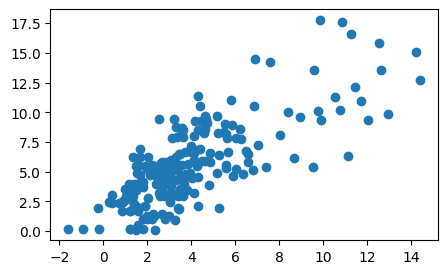

In [ ]:
# OLS로 위 모형을 추정해보시오.
plt.figure(figsize=(5,3))
plt.scatter(df['inflation'], df['fedfunds'])
plt.show()

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('fedfunds ~ inflation', data = df).fit()
# print(model.summary())

In [ ]:
# residuals 잔차

df['ehat'] = model.resid

# 날짜 포맷의 date
df['date'] = pd.to_datetime(df['date'])


/tmp/ipython-input-763347566.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


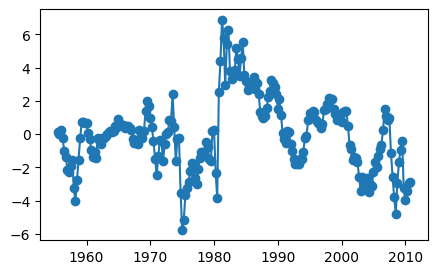

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(df['date'], df['ehat'], marker = 'o')
plt.show()


- 시계열에서는 이러한 계열 상관이 흔함

- 오차항이 계열상관을 갖게 되면, OLS 추정량의 좋은 성질이 다 사라짐
  - 더이상 BLUE(Best Linear Unbiased Estimator)가 아님
  - 어느 방향으로 문제가 생기는지 정확히 알 수가 없음

- 이 문제를 모형화 해서 해결책을 도모
$$
y_t = \beta_0 + \beta_1 x_t + e_t
$$

$$
e_t = \rho e_{t-1} + v_t
$$
- 1 기간 시계열 상관(first-order serial correlation) 혹은 1계 자기상관(first-oder auto-correlation)이라고 부름
- 회귀모형을 다루기 쉬운 형태로 변형(transformation)

$$
y_{t} - \rho y_{t-1} = (\beta_0 -  \rho \beta_0 )+  \beta_1 (x_{t} - \rho x_{t-1}) + (e_{t} - \rho e_{t-1})
$$










$$
y_{t} - \rho y_{t-1} = (\beta_0 -  \rho \beta_0 )+  \beta_1 (x_{t} - \rho x_{t-1}) + v_t
$$

- Cochrane-Orcutt 추정방법

  - y를 x에 OLS 해서 e를 추정한 후에
  - e를 이용해서 $\rho$를 추정하고
  - 수정된 회귀식을 이용해서 계수를 추정
  - 다시 e를 계산하고,
  - 다시 $\rho$ 를 계산한 이후에
  - 이를 반복하여
  - $\rho$가 수렴할 때까지 반복

- 잘 사용하지 않음   


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12345)

In [ ]:
df = pd.DataFrame({
    'eta': np.random.normal(size=1000),
    'x': np.random.normal(size=1000)})

# y_t = 5.0 + 3.0 x_t + e_t
# e_t = 0.9 e_{t-1} + v_t

df['e'] = df['eta'].copy()
for i in range(1,len(df)):
  df.loc[i,'e'] = 0.9*df.loc[i-1,'e'] + df.loc[i,'eta']

# generate y
df['y'] = 5 + 3*df['x'] + df['e']

# generate t
df['t'] = np.arange(1,1001)
